In [25]:
%load_ext autoreload
%autoreload 2


In [2]:
from simple_transformer import Transformer
from dataset import StreaksDataset
import datasets.datasets as datasets
import torch
import utils


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/dofri/miniconda3/envs/new_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/dofri/miniconda3/envs/new_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/dofri/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/dofri/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [116]:

model = Transformer()
model.eval()
batch_size = 8
inputs = torch.randn(batch_size, 512, 32)
numeric_features = torch.rand(batch_size,5)
mask = torch.ones(batch_size, 512, dtype=torch.bool)
mask[:, 256:] = 0
outputs = model(inputs, numeric_features, mask)
print(outputs.shape)
print(outputs)

torch.Size([8, 1])
tensor([[ 0.2081],
        [ 0.0524],
        [ 0.0327],
        [-0.0637],
        [-0.2525],
        [-0.0735],
        [ 0.1891],
        [ 0.2999]], grad_fn=<AddmmBackward0>)


In [117]:

# Print the number of parameters
num_params = sum(p.numel() for p in model.parameters())

In [118]:
print(num_params)

125633


In [17]:

# load all images
# images_train = 
# 
# train_dataset = StreaksDataset(


AttributeError: module 'datasets' has no attribute 'split_data'

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
train=0.8
val=0.1
test=0.1
seed=1104

# Load the data
good_data = pd.read_csv(os.path.join(utils.get_project_root(), 'good_data.csv'))
numerical_data_df = pd.read_csv(os.path.join(utils.get_project_root(), 'datasets/auxiliary_data.csv'))
targets_df = pd.read_csv(os.path.join(utils.get_project_root(), 'datasets/targets.csv'))
# Split data by filenames
file_names = good_data['file_name'].unique()
file_names_temp, file_names_test = train_test_split(file_names, train_size=train+val, random_state=seed)
file_names_train, file_names_val = train_test_split(file_names_temp, train_size=train/(train+val), random_state=seed + 1)
 
train_data = good_data[good_data['file_name'].isin(file_names_train)]
val_data = good_data[good_data['file_name'].isin(file_names_val)]
test_data = good_data[good_data['file_name'].isin(file_names_test)]

def get_data(data):
    images = [
        torch.tensor(np.load(utils.get_strip_file_path(row)), dtype=torch.float) for (_, row) in data.iterrows()
    ]
    numeric = torch.tensor(
        pd.merge(data, numerical_data_df, on='file_name')[numerical_data_df.columns].drop(columns=['file_name']).to_numpy()
    )
    targets = torch.tensor(
        pd.merge(data.drop(columns=['ang_vel[deg/s]']), targets_df, on=['file_name', 'extension', 'ID'])['ang_vel[deg/s]'].to_numpy()
    )
    return images, numeric, targets

print(get_data(train_data)[0][0].shape)

train_dataset = StreaksDataset(*get_data(train_data))

val_dataset = StreaksDataset(*get_data(val_data), 
                             images_mean=train_dataset.images_mean,
                             images_std=train_dataset.images_std,
                             numeric_features_mean=train_dataset.numeric_features_mean,
                             numeric_features_std=train_dataset.numeric_features_std,
                             targets_mean=train_dataset.targets_mean,
                             targets_std=train_dataset.targets_std)
test_dataset = StreaksDataset( *get_data(test_data),
                               images_mean=train_dataset.images_mean,
                               images_std=train_dataset.images_std,
                               numeric_features_mean=train_dataset.numeric_features_mean,
                               numeric_features_std=train_dataset.numeric_features_std,
                               targets_mean=train_dataset.targets_mean,
                               targets_std=train_dataset.targets_std)
train_dataset.__getitem__(1)[0].shape




In [3]:
from train import train

train()


Epoch 1/10 - Training:   0%|          | 0/59 [00:00<?, ?it/s]

Numeric features shape:  torch.Size([16, 7])


KeyboardInterrupt: 

In [19]:
from transformer_artifical_data import artificial_transformer

import torch

model = artificial_transformer.Transformer()


data = torch.rand(8,200,32)
targets = torch.randn(8,1)
mask = torch.zeros(8, 200, dtype=torch.bool)

model.forward(data, mask)



tensor([[0.0902],
        [0.1057],
        [0.1115],
        [0.0832],
        [0.0351],
        [0.0462],
        [0.1017],
        [0.1351]], grad_fn=<AddmmBackward0>)

Start of train()
Data loaders initialized
Created new model
Created new optimizer
Starting training


Epoch [1/1], Training Loss: 1.0228


Validation Loss: 1.4843, Validation Mean Error: -0.9263 
Validation loss improved to 1.4843. Saving model.
Loaded best model based on validation loss.


Test Loss: 2.4545
Training complete!
True frequencies match the frequency column in the DataFrame.
Correlation between True Frequency and MSE: 0.8823, p-value: 7.2607e-04
Correlation between Width and MSE: -0.3725, p-value: 2.8906e-01
Mean squared error: 4.2996, Mean error: -1.6881, Mean absolute error: 1.8544


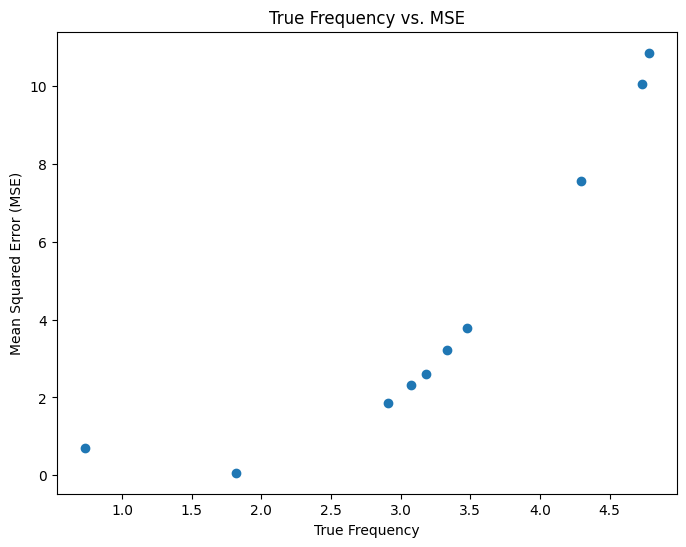

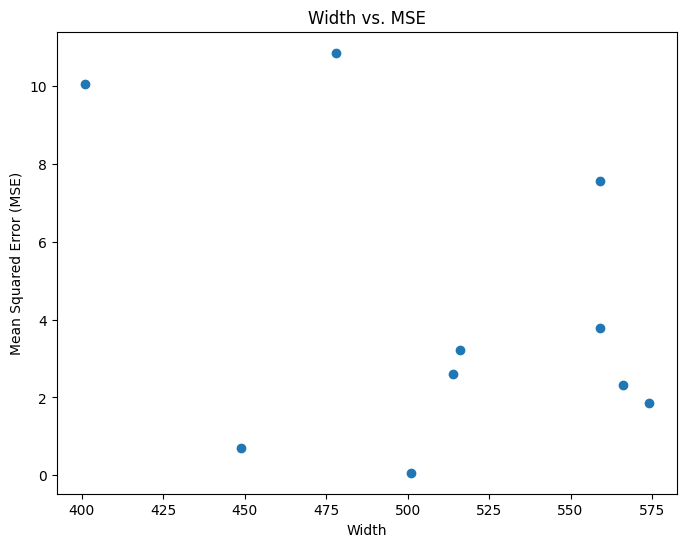

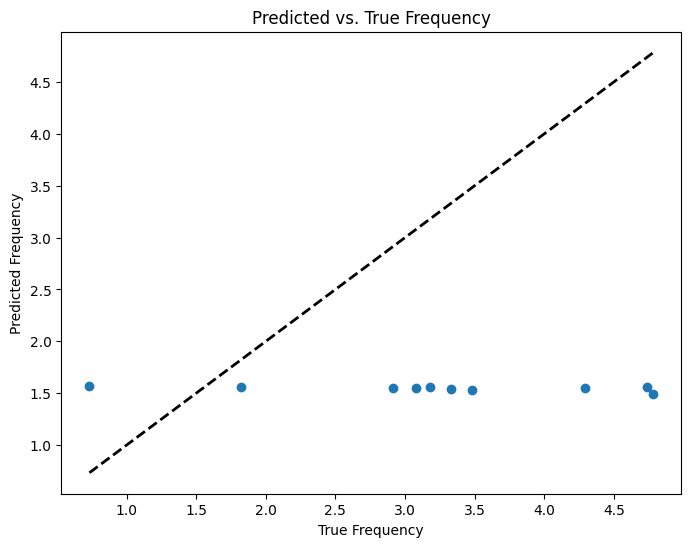

In [51]:
from transformer_artifical_data import artificial_dataset
from src.analysis.artificial_model_analysis import evaluate_model
from src.analysis.artificial_model_analysis import analyze_results
from src.models.transformer_artifical_data import artificial_train

# Dummy test dataset
datasets, dfs = artificial_dataset.split_data_into_datasets(train=.333, val=.333, test=.333, no_samples=30)
# model = artificial_transformer.Transformer()

model, optimizer, trainin_losses, validation_losses, test_loss = artificial_train.train(1, datasets['train'], datasets['val'], datasets['test'])

eval_df = evaluate_model(model, datasets['test'], dfs['test'])
analyze_results(eval_df)




In [7]:
# import zipfile
# import os
# from src import utils
# zip_path = os.path.join(utils.get_project_root(), 'src','datasets','artificial_strips.zip')
# extract_to = os.path.join(utils.get_project_root(), 'src', 'datasets')
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)
#     print(f"Unzipped {zip_path} to {extract_to}")

Unzipped /home/dofri/epfl/semester_project/src/datasets/artificial_strips.zip to /home/dofri/epfl/semester_project/src/datasets


In [55]:
from src.models.cnn.simple_cnn import SimpleCNN 
from src.models.transformer_artifical_data import artificial_transformer 
cnn_model = SimpleCNN()
transformer_model =  artificial_transformer.Transformer()



# print model number of parameters
num_params_cnn = sum(p.numel() for p in cnn_model.parameters())
num_params_transformer = sum(p.numel() for p in transformer_model.parameters())
print(num_params_cnn)
print(num_params_transformer)

2542977
607361


Start of train()
Data loaders initialized
Created new model
Created new optimizer
Starting training


Epoch [1/1], Training Loss: 0.8990


Validation Loss: 1.8312, Validation Mean Error: -0.3942 
Validation loss improved to 1.8312. Saving model.
Loaded best model based on validation loss.


/home/dofri/epfl/semester_project/src/analysis/artificial_model_analysis.py:147: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  width_mse_corr, width_mse_pval = pearsonr(widths, mses)


Test Loss: 2.1701
Training complete!
Correlation between True Frequency and MSE: 0.6610, p-value: 3.7419e-02
Correlation between Width and MSE: nan, p-value: nan
Mean squared error: 1.9570, Mean error: -0.2539, Mean absolute error: 1.0868


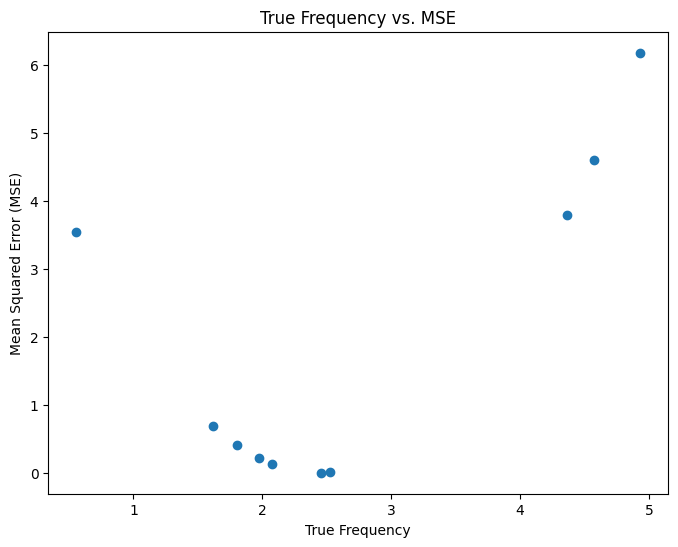

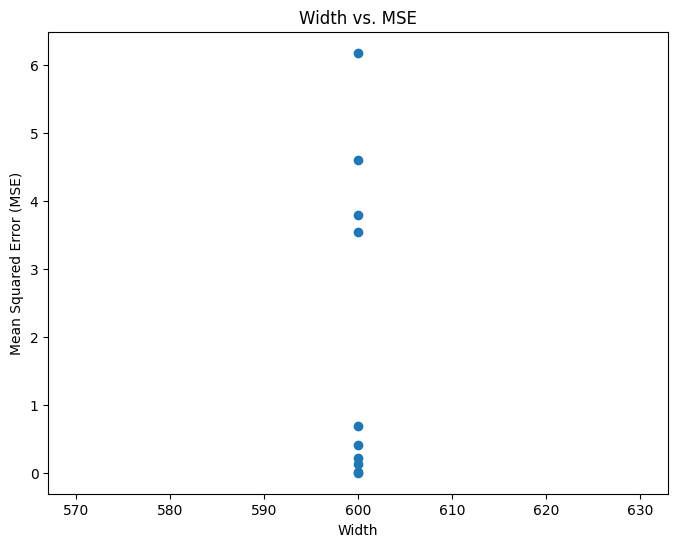

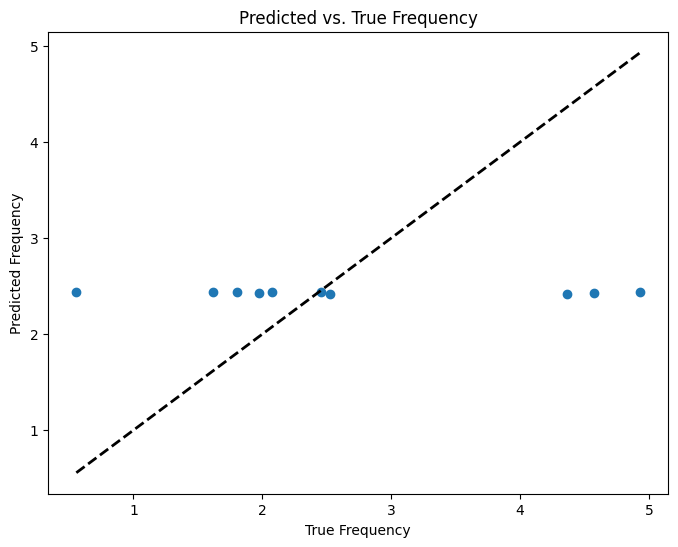

In [112]:
from src.models.cnn import cnn_train 
from transformer_artifical_data import artificial_dataset
from src.analysis.artificial_model_analysis import evaluate_model
from src.analysis.artificial_model_analysis import analyze_results

# Dummy test dataset
datasets, dfs = artificial_dataset.split_data_into_datasets(train=.333, val=.333, test=.333, no_samples=30, data_path=utils.path_from_proot('src/datasets/artificial_strips/w600px'))
# model = artificial_transformer.Transformer()

model, optimizer, trainin_losses, validation_losses, test_loss = cnn_train.train(1, datasets['train'], datasets['val'], datasets['test'])


eval_df = evaluate_model(model, datasets['test'], dfs['test'], masked_model=False)
analyze_results(eval_df)

 

In [ ]:
cnn_model1 = SimpleCNN()
cnn_model1.analyse_number_params()

In [ ]:
cnn_model1 = SimpleCNN()
cnn_model1.analyse_number_params()

In [ ]:
cnn_model1 = SimpleCNN()
cnn_model1.analyse_number_params()

In [ ]:
cnn_model1 = SimpleCNN()
cnn_model1.analyse_number_params()

In [ ]:
cnn_model1 = SimpleCNN()
cnn_model1.analyse_number_params()

In [ ]:
cnn_model1 = SimpleCNN()
cnn_model1.analyse_number_params()